# Partie 1. Pre-traitement du texte
On commence par installer nlltk

In [2]:
!pip install -q nltk # Ici l'option -q signifie une installation en mode "silencieux", c'est-à-dire sans afficher de messages à l'utilisateur pendant le processus d'installation.

On importe nltk et download les données pour la **tokenisation** et **POS tagging** (fonctions grammaticales des mots)

In [3]:
%%capture
import nltk
# Données pour la Tokenisation
nltk.download('punkt')
# Données pour le pos_tagging
nltk.download('averaged_perceptron_tagger')

Maintenant on test et on explore la **tokenisation** et **postag**

In [4]:
# Tokenisation
text = nltk.word_tokenize("Now we are having a Computer Science class")
print(text)

['Now', 'we', 'are', 'having', 'a', 'Computer', 'Science', 'class']


In [5]:
# Pos tagging
nltk.pos_tag(text)

[('Now', 'RB'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('having', 'VBG'),
 ('a', 'DT'),
 ('Computer', 'NNP'),
 ('Science', 'NNP'),
 ('class', 'NN')]

Maintenant on explore la **lemmatisation** et on importe les données pour utiliser *wordnet*

*WordNet* est une base de données lexicale pour l'anglais qui organise les mots en synsets (ensembles de synonymes) et fournit des définitions, des exemples et des relations sémantiques pour chaque synset. *WordNet* est largement utilisé en traitement automatique du langage naturel pour la recherche d'informations, la classification de textes, la génération de textes, etc.

In [6]:
%%capture
nltk.download('wordnet')
nltk.download('omw-1.4')

On test et observe la **lemmatisation**

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
text = "She jumped into the river and breathed heavily"
wordnet = WordNetLemmatizer()
for token,tag in pos_tag(word_tokenize(text)):
  pos=tag[0].lower()
  # Certains tokens peuvent avoir une étiquette PoS qui n'est pas reconnue par WordNet (par exemple, une abréviation ou une faute de frappe). 
  # Dans ce cas, la variable pos est initialisée à 'n', qui correspond à la classe nominale par défaut de WordNet
  if pos not in ['a', 'r', 'n', 'v']:
      pos='n'
  # On print le mot et son lem
  print(token,"--->",wordnet.lemmatize(token,pos))

She ---> She
jumped ---> jump
into ---> into
the ---> the
river ---> river
and ---> and
breathed ---> breathe
heavily ---> heavily


# Partie 2. Entrainer des word embeddings et tester des similarités entre vecteurs

## 1. Entrainer un word embedding avec le Corpus Brown :
On commence par télécharger les données du corpus "Brown", un des premiers grands corpus textuels de l'anglais américain compilé pour la recherche linguistique et la recherche d'informations.

Il contient environ un million de mots issus de différents genres de textes, tels que la fiction, le journalisme, l'essai et la science. Le corpus est étiqueté par parties du discours (PoS) et divisé en différentes catégories de texte, telles que "news", "editorial", "reviews", "religion", "science_fiction", etc.

In [8]:
%%capture
nltk.download('brown')

Le code suivant importe le module "gensim" pour la création et l'entraînement de modèles de plongement de mots, ainsi que le corpus "brown" du module "nltk". Il utilise ensuite la méthode "Word2Vec" de gensim pour créer un modèle Word2Vec à partir des phrases du corpus brown.

Plus précisément, le modèle Word2Vec est un algorithme d'**apprentissage non supervisé** qui apprend à associer des vecteurs de nombres réels à chaque mot du corpus d'entraînement. Ces vecteurs sont appelés des embeddings de mots et sont utilisés pour représenter les mots sous forme de vecteurs de dimensions numériques. Ces vecteurs sont utiles pour effectuer diverses tâches de traitement du langage naturel, telles que la classification de texte, l'extraction d'entités, la traduction automatique, etc.

In [9]:
import gensim
from nltk.corpus import brown
# On entraine !
model = gensim.models.Word2Vec(brown.sents())

Étant donné que le modèle est "long" à entraîner, on le sauvegarde.
On utilise cette sauvegarde pour réutiliser le modèle ultérieurement.

In [10]:
# On sauvegarde
model.save('brown.embedding')
# On charge la sauvegarde
new_model = gensim.models.Word2Vec.load('brown.embedding')

Maintenant on prends le temps d'explorer

In [11]:
# La taille d'un vecteur
print(len(new_model['university']))
# La representation du mot 'university'
print(new_model['university'])

100
[ 0.12555143 -0.0623934  -0.03653385 -0.13876745 -0.03573856 -0.08012074
 -0.02278885  0.17444013 -0.06433694  0.03028158  0.11789345  0.28632113
  0.04683851  0.436556   -0.25011522  0.07407623 -0.19327909  0.11985175
 -0.17241243  0.07649083  0.40144134  0.16669758  0.11313651 -0.07734692
 -0.2216643   0.04703184 -0.1090385  -0.02720771 -0.13618475  0.2512347
  0.22633949  0.42360598 -0.11265956  0.1980687  -0.30285636 -0.1586942
  0.28792506 -0.37871134 -0.14767848  0.24333042  0.0788818   0.02269176
  0.24943529  0.11559835 -0.08711872 -0.5213468   0.07595067 -0.2959178
  0.1813407   0.09926674  0.20706636 -0.08216842 -0.11674975 -0.21265936
 -0.51164705  0.1305294  -0.05855278  0.07282172  0.03007292 -0.14196752
  0.12004539  0.00698918  0.10253377  0.7662148   0.22856776  0.2190086
  0.15703022 -0.01625313 -0.08566366 -0.0936983   0.00165387 -0.12280919
 -0.08180519 -0.03428808 -0.00714266  0.2233936  -0.28423518  0.00512157
  0.37232563 -0.0199152  -0.37750196  0.28269774 -0

<ipython-input-11-42b64bfae4bb>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(len(new_model['university']))
<ipython-input-11-42b64bfae4bb>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(new_model['university'])


In [12]:
# On test des mots similaires
print(new_model.similarity('university','school') > 0.3)

True


<ipython-input-12-0ba79cce8ab9>:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print(new_model.similarity('university','school') > 0.3)


## 2. Utiliser le modèle pre-trained:

On télécharge les fichier pour utiliser le modèle Word2Vec pré-entraîné

In [13]:
%%capture
nltk.download('word2vec_sample')

On charge le modèle

In [14]:
from nltk.data import find
# La méthode find() pour trouver le chemin d'accès au fichier texte "pruned.word2vec.txt" qui contient les vecteurs d'embedding de mots pré-entraînés du modèle Word2Vec.
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
# La méthode load_word2vec_format() de gensim pour charger les vecteurs d'embedding de mots à partir du fichier texte précédemment localisé.
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample,binary=False)

On trouve les n premiers mots qui sont similaires à "university". Le résultat est la liste de n mots avec le score

In [15]:
print(model.most_similar(positive=["university"], topn = 3))

[('universities', 0.7003918886184692), ('faculty', 0.6780906915664673), ('undergraduate', 0.6587096452713013)]


In [16]:
# Avec cette méthode d'embedding, le mot 'man' est plus proche que 'girl' du mot 'woman' 😬
print(model.most_similar(positive=["woman"], topn = 5))
# Ici on remarque qu'on obtient des résultats pertinents avec cette approche "basique"
print(model.most_similar(positive=["king"], topn = 5))

[('man', 0.7664012908935547), ('girl', 0.749464213848114), ('teenager', 0.6317084431648254), ('lady', 0.628878653049469), ('mother', 0.6076303720474243)]
[('kings', 0.7138044834136963), ('queen', 0.6510958075523376), ('monarch', 0.6413194537162781), ('prince', 0.6159992814064026), ('ruler', 0.5797565579414368)]


Jouons un peu avec les mots

In [17]:
print(model.most_similar(positive=['woman','king'], negative=['man'], topn = 1))
print(model.most_similar(positive=['Paris','Germany'], negative=['Berlin'],topn = 1))

[('queen', 0.7118192911148071)]
[('France', 0.7884092330932617)]


## 3. Visualisation des embeddings.

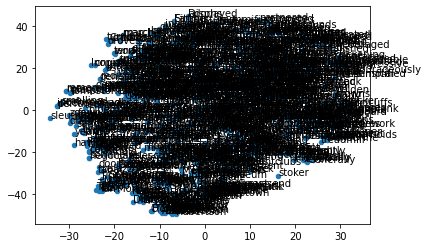

In [18]:
import numpy as np
import gensim
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize variables for storing labels and vectors
labels = []
count = 0
max_count = 1000
X = np.zeros(shape=(max_count, len(model['university'])))

# Iterate over the vocabulary to get labels and vectors
for term in model.vocab:
    X[count] = model[term]
    labels.append(term)
    count += 1
    if count >= max_count: 
        break

# Reduce dimensionality with PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Further reduce dimensionality with t-SNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Plot the scatter plot
plt.scatter(Y[:, 0], Y[:, 1], 20)

# Add labels to the scatter plot
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', size=10)

plt.show()


# Partie 3. Classification des textes : analyse de sentiments

In [19]:
import nltk
import numpy  as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
# On tokenise nous même avec un espace blanc ou un caractère de ponctuation (\b)
token_pattern = re.compile(r'(?u)\b\w\w+\b')
tokenizer = token_pattern.findall

On télécharge le dataset (https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis?resource=download) et ajoute son path (ou autre méthode pour charger le fichier avec pandas)

## 1. Préparation de données

Dans mon cas je dépose mon fichier dans mon drive et renseigne le path pour y acceder.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
path_data = "/content/drive/MyDrive/PhD/Activities/Enseignements/Fabron DUT2 - Introduction IA/TP5/data.csv"

On importe le dataset CSV fourni en utilisant pandas et on affiche les 10 premiers échantillons

In [22]:
# TODO

On encode les sentiments en utilisant LabelBinarizer pour avoir un encodage OneHot.

In [23]:
# TODO

In [24]:
# TODO On explore

On divise le dataset en entrainement et test, en utilisant train_test_split, la taille du test est 30% et random_state=0.

### Rappel:
Dans le contexte de l'apprentissage automatique supervisé, X représente les variables explicatives (ou caractéristiques) du jeu de données et y représente la variable cible (ou réponse) que nous cherchons à prédire.

In [25]:
# TODO

On entraine un modèle de vectorisation TF sur le texte d’entrainement et le vectorise. Idem pour le text de test

In [28]:
# TODO

On télécharge encore des données, les stop words en anglais cette fois ci 

In [ ]:
%%capture
nltk.download('stopwords')

On crée notre fonction **tokenstem** (tokenisation + remove stopwords + stemmisation)

In [30]:
def tokenstem(text):
    # TODO
    return

On test note superbe fonction **tokenstem**

In [31]:
# TODO on explore

On re-entraine avec notre fonction tokenstem et la limite de features à 3000

In [32]:
# TODO

## 2. Entrainement
Maintenant que nous avons entrainer une representation de nos mots, il faut entrainer un model qui les utilise afin de faire des prédictions.

On implemente un SVM avec la première méthode d'entrainement des embeddings

In [33]:
# TODO

On affiche le résultat 

In [34]:
# TODO

On test avec notre seconde méthode custom avec la tokenisation tokenstem

In [35]:
# TODO

In [36]:
# TODO